# PREDICTING CREDIT WORTHINESS OF SMALL BUSINESSES

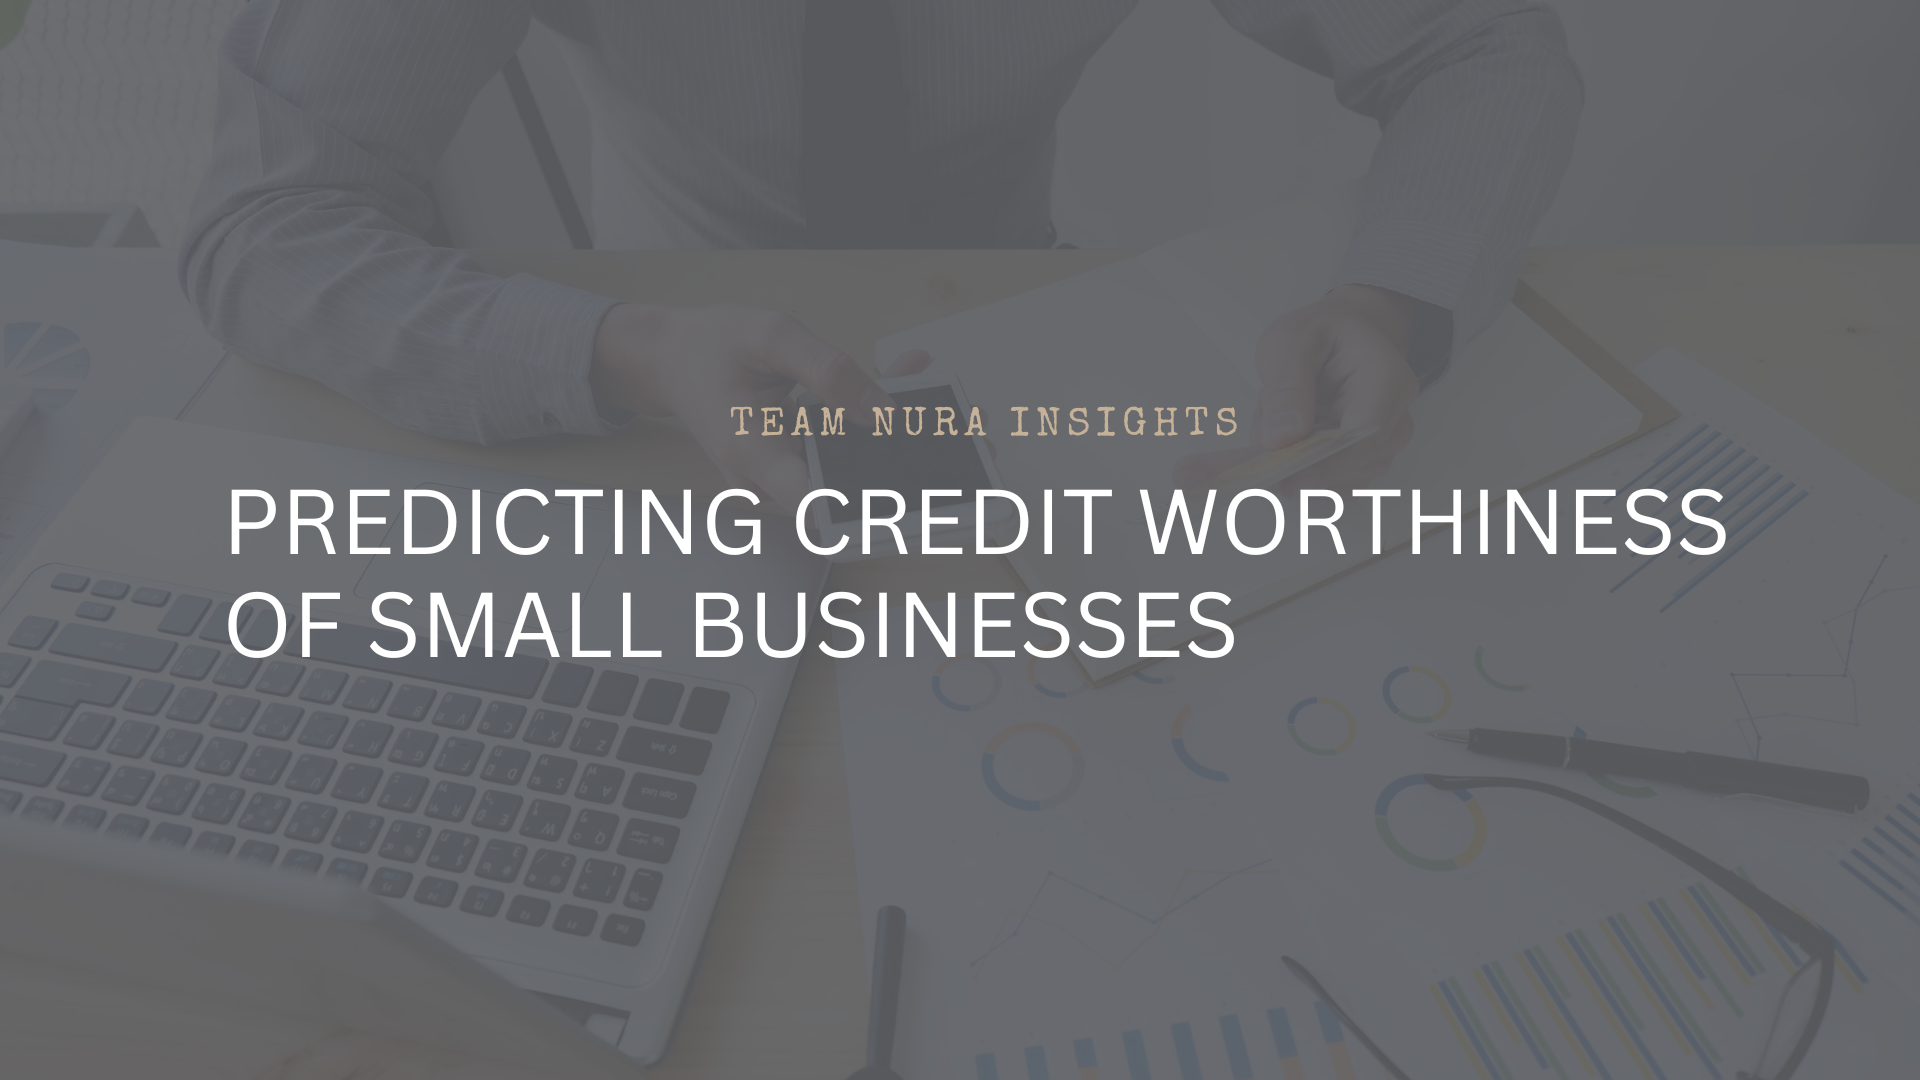

In [ ]:
%%html
<marquee style='width: 80%; color: white; background-color: grey; font-size: 24px;'><b>Predicting Creditworthiness of Small Businesses</b></marquee>

## I. Introduction

### 1.1 Problem Statement


In pursuit of evaluating the creditworthiness of small businesses across diverse metrics, this project aims to provide valuable insights for financial decision-making. Understanding the factors that contribute to the financial health and viability of small businesses is crucial for lenders, policymakers, and stakeholders alike. By leveraging a comprehensive dataset encompassing various attributes such as loan details, borrower information, and economic indicators, this analysis endeavors to identify patterns and predictors of creditworthiness. Such insights can inform lending practices, risk assessment strategies, and support initiatives aimed at fostering the growth and sustainability of small businesses.



### 1.2 Data Sources

The dataset utilized for this analysis comprises 94,673 observations and 35 columns, encompassing a wide array of data types including datetime, integer, float, and object. Key variables include loan details (such as approval date, loan duration, and disbursement date), borrower information (such as name, address, and business type), and financial metrics (such as gross approval amount, charge-off amount, and jobs supported). Access to the dataset can be found [here](https://data.world/makeovermonday/2023w6).

### 1.3 Data Dictionary

| Column                  | Description                                        | Possible Values                     |
|-------------------------|----------------------------------------------------|-------------------------------------|
| AsOfDate                | Date of data collection                            | Date format                         |
| Program                 | Program identifier                                 | Integer                             |
| BorrName                | Name of the borrower                               | String                              |
| BorrStreet              | Street address of the borrower                     | String                              |
| BorrCity                | City of the borrower                               | String                              |
| BorrState               | State of the borrower                              | String                              |
| BorrZip                 | ZIP code of the borrower                           | Integer                             |
| CDC_Name                | Name of the Certified Development Company (CDC)    | String                              |
| CDC_Street              | Street address of the CDC                          | String                              |
| CDC_City                | City of the CDC                                    | String                              |
| CDC_State               | State of the CDC                                   | String                              |
| CDC_Zip                 | ZIP code of the CDC                                | Float                               |
| ThirdPartyLender_Name   | Name of the third-party lender                     | String                              |
| ThirdPartyLender_City   | City of the third-party lender                     | String                              |
| ThirdPartyLender_State  | State of the third-party lender                    | String                              |
| ThirdPartyDollars       | Dollar amount from the third party                 | Float                               |
| GrossApproval           | Gross approval amount                              | Integer                             |
| ApprovalDate            | Date of loan approval                              | Date format                         |
| ApprovalFiscalYear      | Fiscal year of loan approval                       | Integer                             |
| FirstDisbursementDate   | Date of first disbursement                         | Date format                         |
| DeliveryMethod          | Method of loan delivery                            | String                              |
| subpgmdesc              | Description of subprogram                          | String                              |
| TermInMonths            | Loan term in months                                | Integer                             |
| NaicsCode               | NAICS code                                         | Float                               |
| NaicsDescription        | Description of NAICS code                          | String                              |
| FranchiseCode           | Franchise code                                     | Integer                             |
| FranchiseName           | Name of the franchise                              | String                              |
| ProjectCounty           | County of the project                              | String                              |
| ProjectState            | State of the project                               | String                              |
| SBADistrictOffice       | Small Business Administration district office      | String                              |
| CongressionalDistrict   | Congressional district                             | Float                               |
| BusinessType            | Type of business                                   | String                              |
| LoanStatus              | Status of the loan                                 | PIF, EXEMPT, CANCLD, CHGOFF, NOT FUNDED |
| PaidInFullDate          | Date when loan was paid in full                    | Date format                         |
| ChargeOffDate           | Date when the loan was charged off                 | Date format                         |
| GrossChargeOffAmount    | Gross charge off amount                            | Integer                             |
| JobsSupported           | Number of jobs supported                           | Integer                             |
| LoanStatusValue         | Numerical value representing loan status           | 0 (Not Funded or Charged Off), 1 (PIF, Exempt, or Cancelled), 2 (Other) |


## II. Exploratory Data Analysis

### 2.1 Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from google.colab import drive

from sklearn import set_config
set_config(display='diagram')

In [ ]:
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Colab Notebooks/NuraInsights/data/'

data = pd.read_csv(data_folder + "bank.csv", encoding='latin-1', low_memory=False)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AsOfDate  Program                        BorrName  \
0  20220930      504                   Turning Brook   
1  20220930      504                     Hammes Seed   
2  20220930      504             Rocket Express, LLC   
3  20220930      504              Martin Harper P.C.   
4  20220930      504  Shield Security Systems, L.L.C   

                       BorrStreet          BorrCity BorrState  BorrZip  \
0    300 & 400 Oxbow Dr 100 Villa            Alpena        MI    49707   
1                 1123 120th Rd..            Seneca        KS    66538   
2  1122 Blue Laker Boulevard Nort        Twin falls        ID    83301   
3             3 E. Ramona Avenue.  Colorado springs        CO    80905   
4           7456 West 5th Avenue.          Lakewood        CO    80226   

                         CDC_Name                     CDC_Street  \
0  Michigan Certified Development  3737 Coolidge Road, 2nd Floor   
1  Frontier Financial Partners, I                1512 W 6th Ave.   
2  Region IV Development Corporat               202 Falls Avenue   
3  Pikes Peak Regional Developmen          322 S. Cascade Avenue   
4                  B:Side Capital             3550 Brighton Blvd   

           CDC_City  ... ProjectState            SBADistrictOffice  \
0      East Lansing  ...           MI     MICHIGAN DISTRICT OFFICE   
1           Emporia  ...           KS  KANSAS CITY DISTRICT OFFICE   
2        Twin Falls  ...           ID        BOISE DISTRICT OFFICE   
3  Colorado Springs  ...           CO     COLORADO DISTRICT OFFICE   
4            Denver  ...           CO     COLORADO DISTRICT OFFICE   

  CongressionalDistrict BusinessType BusinessAge  LoanStatus  PaidInFullDate  \
0                   1.0  CORPORATION         NaN         PIF      12/31/2012   
1                   2.0  CORPORATION         NaN      EXEMPT             NaN   
2                   2.0  CORPORATION         NaN         PIF      09/30/2015   
3                   5.0  CORPORATION         NaN         PIF      11/30/2020   
4                   1.0  CORPORATION         NaN         PIF      05/31/2016   

  ChargeOffDate  GrossChargeOffAmount JobsSupported  
0           NaN                     0            14  
1           NaN                     0             1  
2           NaN                     0             8  
3           NaN                     0             1  
4           NaN                     0            40  

[5 rows x 38 columns]

In [ ]:
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 94673
Number of columns: 38


In [ ]:
data.describe()

AsOfDate  Program       BorrZip       CDC_Zip  ThirdPartyDollars  \
count     94673.0  94673.0  94673.000000  94672.000000       9.466700e+04   
mean   20220930.0    504.0  56999.084913  57224.268717       1.030528e+06   
std           0.0      0.0  30736.819789  30814.733820       1.330149e+06   
min    20220930.0    504.0    601.000000    918.000000       0.000000e+00   
25%    20220930.0    504.0  32808.000000  32303.000000       3.231110e+05   
50%    20220930.0    504.0  58078.000000  58104.000000       6.100000e+05   
75%    20220930.0    504.0  86336.000000  85711.000000       1.199000e+06   
max    20220930.0    504.0  99901.000000  99212.000000       3.029974e+07   

       GrossApproval  ApprovalFiscalYear  TermInMonths      NaicsCode  \
count   9.467300e+04        94673.000000  94673.000000   94482.000000   
mean    7.644223e+05         2016.022657    252.294392  536241.338498   
std     8.286973e+05            3.979294     37.686031  168412.971186   
min     5.400000e+02         2010.000000      7.000000  111110.000000   
25%     2.580000e+05         2012.000000    240.000000  424450.000000   
50%     4.830000e+05         2016.000000    240.000000  541310.000000   
75%     9.280000e+05         2020.000000    300.000000  713910.000000   
max     5.500000e+06         2022.000000    300.000000  999990.000000   

       CongressionalDistrict  GrossChargeOffAmount  JobsSupported  
count           94667.000000          9.467300e+04   94673.000000  
mean               10.005577          4.169675e+03      10.583778  
std                11.734050          7.037264e+04      17.817559  
min                 0.000000          0.000000e+00       0.000000  
25%                 2.000000          0.000000e+00       2.000000  
50%                 5.000000          0.000000e+00       5.000000  
75%                13.000000          0.000000e+00      12.000000  
max                53.000000          4.486077e+06     763.000000

In [ ]:
data.corr(numeric_only=True)

AsOfDate  Program   BorrZip   CDC_Zip  \
AsOfDate                    NaN      NaN       NaN       NaN   
Program                     NaN      NaN       NaN       NaN   
BorrZip                     NaN      NaN  1.000000  0.993930   
CDC_Zip                     NaN      NaN  0.993930  1.000000   
ThirdPartyDollars           NaN      NaN  0.072156  0.073989   
GrossApproval               NaN      NaN  0.083438  0.085523   
ApprovalFiscalYear          NaN      NaN  0.003406  0.003281   
TermInMonths                NaN      NaN  0.072400  0.072803   
NaicsCode                   NaN      NaN -0.058944 -0.060321   
CongressionalDistrict       NaN      NaN  0.326447  0.325576   
GrossChargeOffAmount        NaN      NaN -0.016140 -0.014816   
JobsSupported               NaN      NaN  0.027139  0.029141   

                       ThirdPartyDollars  GrossApproval  ApprovalFiscalYear  \
AsOfDate                             NaN            NaN                 NaN   
Program                              NaN            NaN                 NaN   
BorrZip                         0.072156       0.083438            0.003406   
CDC_Zip                         0.073989       0.085523            0.003281   
ThirdPartyDollars               1.000000       0.933329            0.105658   
GrossApproval                   0.933329       1.000000            0.131257   
ApprovalFiscalYear              0.105658       0.131257            1.000000   
TermInMonths                    0.109324       0.133201            0.563178   
NaicsCode                       0.021652      -0.013933           -0.005138   
CongressionalDistrict           0.096745       0.112390           -0.012158   
GrossChargeOffAmount            0.042834       0.045731           -0.053225   
JobsSupported                   0.356509       0.378758           -0.063353   

                       TermInMonths  NaicsCode  CongressionalDistrict  \
AsOfDate                        NaN        NaN                    NaN   
Program                         NaN        NaN                    NaN   
BorrZip                    0.072400  -0.058944               0.326447   
CDC_Zip                    0.072803  -0.060321               0.325576   
ThirdPartyDollars          0.109324   0.021652               0.096745   
GrossApproval              0.133201  -0.013933               0.112390   
ApprovalFiscalYear         0.563178  -0.005138              -0.012158   
TermInMonths               1.000000   0.059048               0.061823   
NaicsCode                  0.059048   1.000000              -0.082928   
CongressionalDistrict      0.061823  -0.082928               1.000000   
GrossChargeOffAmount      -0.037696   0.006219              -0.008045   
JobsSupported             -0.053631  -0.028042               0.030017   

                       GrossChargeOffAmount  JobsSupported  
AsOfDate                                NaN            NaN  
Program                                 NaN            NaN  
BorrZip                           -0.016140       0.027139  
CDC_Zip                           -0.014816       0.029141  
ThirdPartyDollars                  0.042834       0.356509  
GrossApproval                      0.045731       0.378758  
ApprovalFiscalYear                -0.053225      -0.063353  
TermInMonths                      -0.037696      -0.053631  
NaicsCode                          0.006219      -0.028042  
CongressionalDistrict             -0.008045       0.030017  
GrossChargeOffAmount               1.000000       0.048460  
JobsSupported                      0.048460       1.000000

### 2.2 Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94673 entries, 0 to 94672
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AsOfDate                94673 non-null  int64  
 1   Program                 94673 non-null  int64  
 2   BorrName                94673 non-null  object 
 3   BorrStreet              94673 non-null  object 
 4   BorrCity                94673 non-null  object 
 5   BorrState               94673 non-null  object 
 6   BorrZip                 94673 non-null  int64  
 7   CDC_Name                94672 non-null  object 
 8   CDC_Street              94672 non-null  object 
 9   CDC_City                94672 non-null  object 
 10  CDC_State               94672 non-null  object 
 11  CDC_Zip                 94672 non-null  float64
 12  ThirdPartyLender_Name   94612 non-null  object 
 13  ThirdPartyLender_City   94590 non-null  object 
 14  ThirdPartyLender_State  94585 non-null

In [ ]:
# Convert the 'AsOfDate' column to datetime format
data['AsOfDate'] = pd.to_datetime(data['AsOfDate'])

In [ ]:
# Checking for NULLs in the data
nan_counts = data.isnull().sum()
nan_percent = data.isnull().sum()/data.shape[0]
nans_dict = {'count_of_nans':nan_counts, 'percent_of_nans':nan_percent}
nans_df = pd.DataFrame(nans_dict).sort_values('percent_of_nans')
nans_df[nans_df.count_of_nans > 0]

count_of_nans  percent_of_nans
ProjectCounty                       1         0.000011
CDC_City                            1         0.000011
CDC_State                           1         0.000011
CDC_Name                            1         0.000011
CDC_Street                          1         0.000011
CDC_Zip                             1         0.000011
ThirdPartyDollars                   6         0.000063
CongressionalDistrict               6         0.000063
LoanStatus                          7         0.000074
ThirdPartyLender_Name              61         0.000644
ThirdPartyLender_City              83         0.000877
ThirdPartyLender_State             88         0.000930
NaicsCode                         191         0.002017
NaicsDescription                  869         0.009179
subpgmdesc                       2557         0.027009
FirstDisbursementDate           19083         0.201568
BusinessAge                     57162         0.603784
PaidInFullDate                  68557         0.724145
FranchiseCode                   85026         0.898102
FranchiseName                   85032         0.898165
ChargeOffDate                   93910         0.991941

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = (data.isnull().sum() / len(data)) * 100

# Identify columns with more than 30% null values
columns_to_drop = null_percentages[null_percentages > 20].index
print("Columns with more han 20% missing values that we proceed to drop:", list(columns_to_drop))

# Drop the identified columns
data.drop(columns=columns_to_drop, inplace=True)

Columns with more han 20% missing values that we proceed to drop: ['FirstDisbursementDate', 'FranchiseCode', 'FranchiseName', 'BusinessAge', 'PaidInFullDate', 'ChargeOffDate']


In [ ]:
# Checking for NULLs in the data
nan_counts = data.isnull().sum()
nan_percent = data.isnull().sum()/data.shape[0]
nans_dict = {'count_of_nans':nan_counts, 'percent_of_nans':nan_percent}
nans_df = pd.DataFrame(nans_dict).sort_values('percent_of_nans')
nans_df = nans_df[nans_df.count_of_nans > 0]
nans_df

count_of_nans  percent_of_nans
ProjectCounty                       1         0.000011
CDC_State                           1         0.000011
CDC_Zip                             1         0.000011
CDC_Street                          1         0.000011
CDC_City                            1         0.000011
CDC_Name                            1         0.000011
CongressionalDistrict               6         0.000063
ThirdPartyDollars                   6         0.000063
LoanStatus                          7         0.000074
ThirdPartyLender_Name              61         0.000644
ThirdPartyLender_City              83         0.000877
ThirdPartyLender_State             88         0.000930
NaicsCode                         191         0.002017
NaicsDescription                  869         0.009179
subpgmdesc                       2557         0.027009

In [ ]:
# Imputing remaining NULLs with appropriate values
null_cols = list(nans_df[nans_df.percent_of_nans <= 20].index)

for col in null_cols:
    if data[col].dtype == 'object':
        # Impute categorical columns with the mode
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        # Impute numerical columns with the mean or median
        data[col].fillna(data[col].median(), inplace=True)

In [ ]:
data.isnull().sum()

AsOfDate                  0
Program                   0
BorrName                  0
BorrStreet                0
BorrCity                  0
BorrState                 0
BorrZip                   0
CDC_Name                  0
CDC_Street                0
CDC_City                  0
CDC_State                 0
CDC_Zip                   0
ThirdPartyLender_Name     0
ThirdPartyLender_City     0
ThirdPartyLender_State    0
ThirdPartyDollars         0
GrossApproval             0
ApprovalDate              0
ApprovalFiscalYear        0
DeliveryMethod            0
subpgmdesc                0
TermInMonths              0
NaicsCode                 0
NaicsDescription          0
ProjectCounty             0
ProjectState              0
SBADistrictOffice         0
CongressionalDistrict     0
BusinessType              0
LoanStatus                0
GrossChargeOffAmount      0
JobsSupported             0
dtype: int64

### 2.3 Visualization

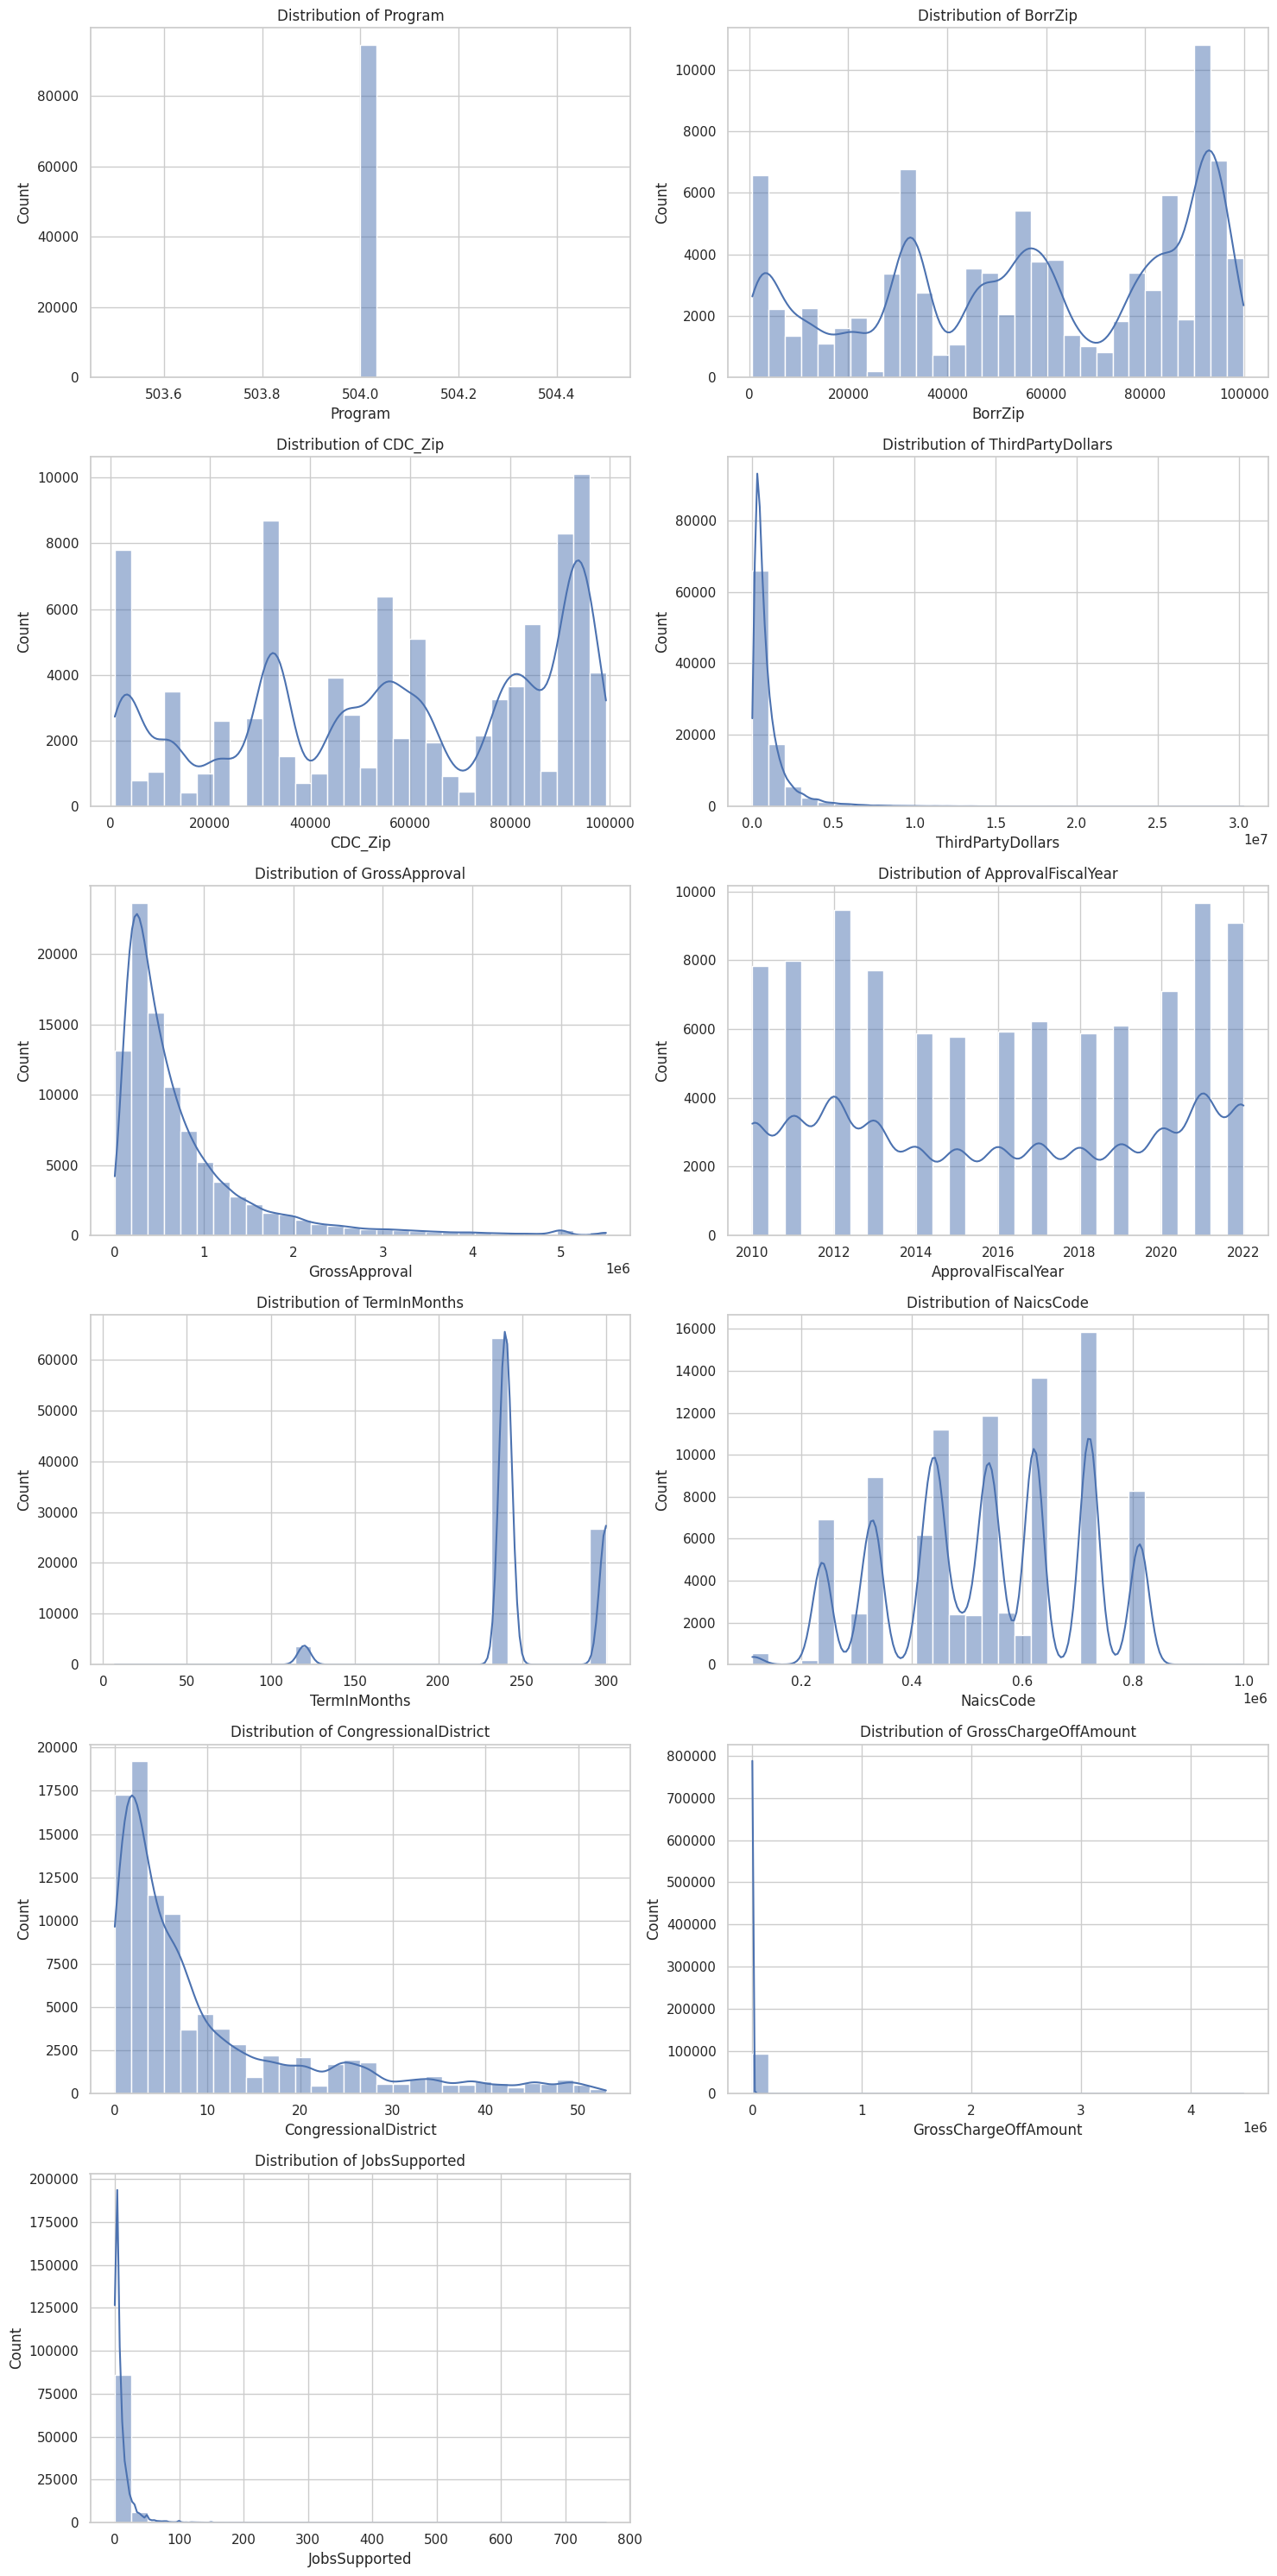

In [ ]:
# Identifying all numerical columns in the dataframe
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  # Round up to the nearest integer

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Flatten axes to handle both 1-row and multi-row subplots
axs = axs.flatten()

# Plot distributions for all numerical columns
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(num_cols, len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

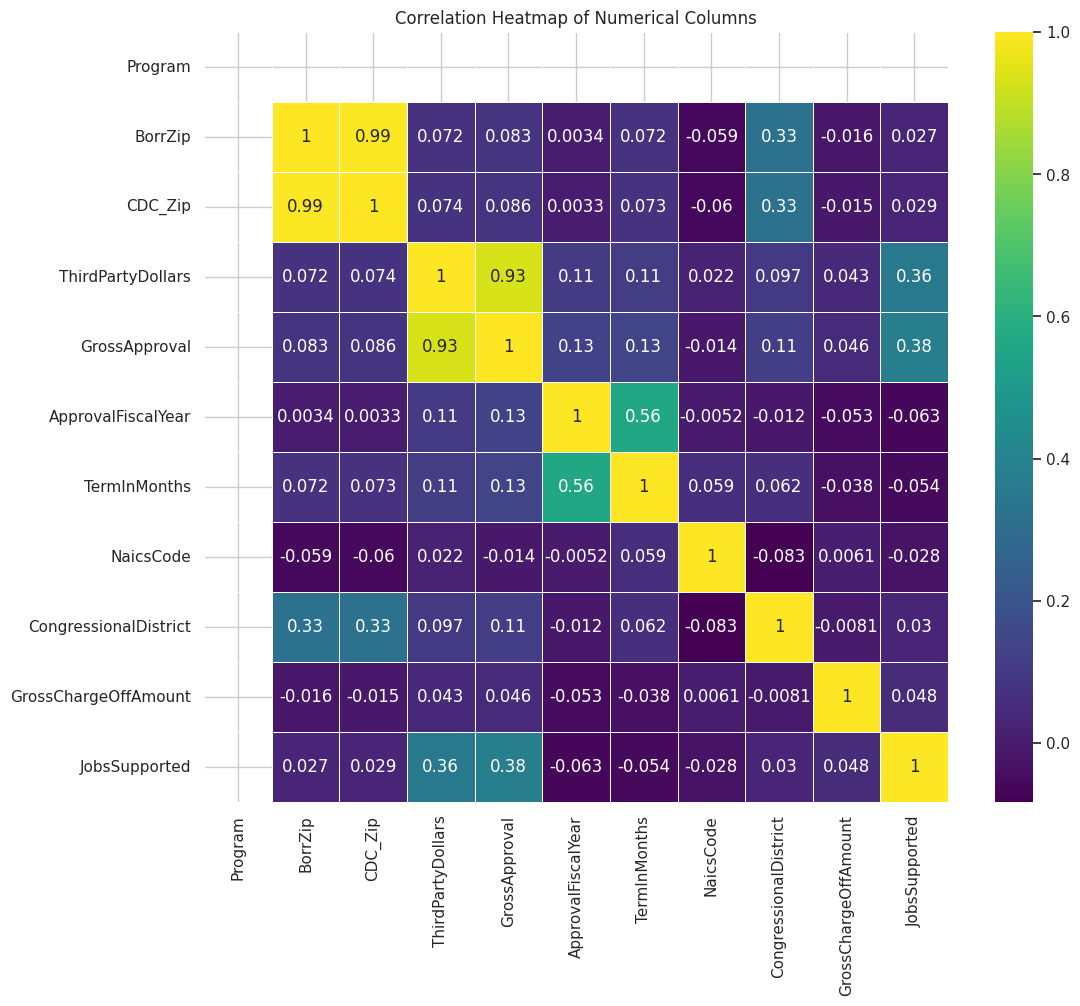

In [ ]:
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [ ]:
ocean_green_color = 'rgb(28, 172, 120)'

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data.groupby('ApprovalFiscalYear').mean().index,
                          y=data.groupby('ApprovalFiscalYear')['GrossApproval'].mean(),
                          mode='lines+markers',
                          name='Average Gross Approval Amount',
                          line=dict(color=ocean_green_color)))

fig1.update_layout(title='Average Gross Approval Amount Over Fiscal Years',
                   xaxis_title='Fiscal Year',
                   yaxis_title='Average Gross Approval Amount',
                   showlegend=True,
                   template="plotly_white")

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data.groupby('ApprovalFiscalYear').size().index,
                          y=data.groupby('ApprovalFiscalYear').size(),
                          mode='lines+markers',
                          name='Number of Loans',
                          line=dict(color='purple')))
fig2.update_layout(title='Number of Loans Issued Over Fiscal Years',
                   xaxis_title='Fiscal Year',
                   yaxis_title='Number of Loans',
                   showlegend=True,
                   template="plotly_white")

fig = make_subplots(rows=1, cols=2)

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

fig.update_layout(title_text="Trends Over Fiscal Years",
                  template="plotly_white")

fig.show()

<ipython-input-133-8ee95ff68cc3>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
state_counts = data['BorrState'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

fig = px.choropleth(state_counts,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    color_continuous_scale='Viridis',
                    scope="usa",
                    labels={'Count':'Number of Loans'}
                   )
fig.update_layout(title_text = 'Geographical Distribution of Loans Across the USA')
fig.show()

In [ ]:
yearly_data = data.groupby('ApprovalFiscalYear')['GrossApproval'].mean().reset_index()

fig = px.scatter(yearly_data, x='ApprovalFiscalYear', y='GrossApproval', trendline="ols",
                 title='Average Gross Approval Amount vs. Fiscal Year',
                 labels={'ApprovalFiscalYear': 'Fiscal Year', 'GrossApproval': 'Average Gross Approval Amount ($)'})

fig.update_traces(marker=dict(color='rgb(28, 172, 120)'))  # Ocean green color

fig.show()

In [ ]:
bins = [0, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 1000000, np.inf]
labels = ['Less than $5,000', '$5,000 to $9,999', '$10,000 to $24,999', '$25,000 to $49,999',
          '$50,000 to $99,999', '$100,000 to $249,999', '$250,000 to $499,999', '$500,000 to $999,999', '$1,000,000 or more']

# new column 'ApprovalAmountRange' to categorize GrossApproval amounts
data['ApprovalAmountRange'] = pd.cut(data['GrossApproval'], bins=bins, labels=labels, right=False)

# the number of loans in each category
approval_amount_distribution = data['ApprovalAmountRange'].value_counts().sort_index()

In [ ]:
df = pd.DataFrame({'Loan Amount Range': approval_amount_distribution.index,
                   'Number of Loans': approval_amount_distribution.values})

fig = px.bar(df, y='Loan Amount Range', x='Number of Loans',
             orientation='h',  # Horizontal orientation
             labels={'Number of Loans': 'Number of Loans'},
             title='Number of Loans by Gross Approval Amount Range')

fig.show()

In [ ]:
fig = px.box(data, y=['GrossApproval', 'ThirdPartyDollars'], title='Boxplot of Gross Approval and Third Party Dollars Amounts')

fig.show()

if 'BusinessType' in data.columns:
    # Calculate counts of BusinessType
    business_type_counts = data['BusinessType'].value_counts().reset_index()
    business_type_counts.columns = ['BusinessType', 'Count']

    fig = px.bar(business_type_counts, y='BusinessType', x='Count', orientation='h', title='Count of Business Types')
    fig.show()
else:
    print("The 'BusinessType' column does not exist in the dataset.")

## III. Data Modeling

### 3.1 Target Variable

In [ ]:
# # Example: Creating a new feature 'LoanDuration' based on 'ApprovalDate' and 'FirstDisbursementDate'
# data['ApprovalDate'] = pd.to_datetime(data['ApprovalDate'])
# data['FirstDisbursementDate'] = pd.to_datetime(data['FirstDisbursementDate'])
# data['LoanDuration'] = (data['FirstDisbursementDate'] - data['ApprovalDate']).dt.days

In [ ]:
# Preparing Target Variable
data['LoanStatusValue'] = data['LoanStatus'].map({
    'NOT FUNDED': 0,
    'CHGOFF': 0,
    'PIF': 1,
    'EXEMPT': 1,
    'CANCLD': 1,
})

data['LoanStatusValue'].fillna(2, inplace=True)

### 3.2 Preprocessing Pipeline

In [ ]:
# Splitting target and explanatory variables
X = data.drop(['LoanStatusValue', 'LoanStatus'], axis=1)
y = data['LoanStatusValue']

In [ ]:
y.value_counts()

1    84831
0     9842
Name: LoanStatusValue, dtype: int64

In [ ]:
# Function to extract categorical columns
def get_cat_columns(X):
    return list(X.select_dtypes(include=['object']).columns)

# Function to extract numerical columns
def get_num_columns(X):
    return list(X.select_dtypes(include=['int64', 'float64']).columns)

# Categorical and Numerical Columns
cat_columns = get_cat_columns(X)  # Extract categorical columns dynamically
num_columns = get_num_columns(X)  # Extract numerical columns dynamically

# Define numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Define preprocessing pipeline
prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
])

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Program', 'BorrZip', 'CDC_Zip',
                                  'ThirdPartyDollars', 'GrossApproval',
                                  'ApprovalFiscalYear', 'TermInMonths',
                                  'NaicsCode', 'CongressionalDistrict',
                                  'GrossChargeOffAmount', 'JobsSupported']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  Simple...
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['BorrName', 'BorrStreet', 'BorrCity',
                                  'BorrState', 'CDC_Name', 'CDC_Street',
                                  'CDC_City', 'CDC_State',
                                  'ThirdPartyLender_Name',
                                  'ThirdPartyLender_City',
                                  'ThirdPartyLender_State', 'ApprovalDate',
                                  'DeliveryMethod', 'subpgmdesc',
                                  'NaicsDescription', 'ProjectCounty',
                                  'ProjectState', 'SBADistrictOffice',
                                  'BusinessType'])])

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 3.3 Classification Alogrithms

#### Defining Classification Evaluation Function

In [ ]:
def evaluate_classification_model(model, X_train, y_train, X_test, y_test, cost_weight_fp=1, cost_weight_fn=10, cv_folds=5):
    # Fit the model
    model.fit(X_train, y_train)

    # Predicting label
    y_pred = model.predict(X_test)

    # Accuracy metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(values_format='d')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, digits=3)
    print('Classification Report:')
    print(report)

    # Calculate ROC Curve and AUC
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Print results
    print(f'Balanced accuracy: {balanced_accuracy:.3f}')

Preprocessing the X set

In [ ]:
# Preprocessed X & y sets
X_train = prep_pipeline.fit_transform(X_train)
X_test = prep_pipeline.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 4, 5, 6, 8, 9, 11, 14, 15] during transform. These unknown categories will be encoded as all zeros



Handling Imbalance in Target Variable

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on the training data only
X_train, y_train = smote.fit_resample(X_train, y_train)

#### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



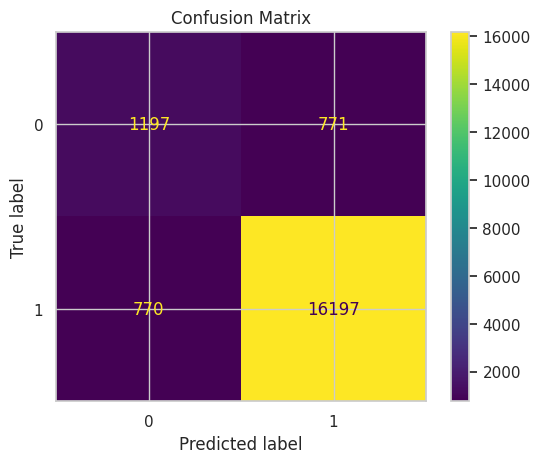

Classification Report:
              precision    recall  f1-score   support

           0      0.609     0.608     0.608      1968
           1      0.955     0.955     0.955     16967

    accuracy                          0.919     18935
   macro avg      0.782     0.781     0.781     18935
weighted avg      0.919     0.919     0.919     18935

Balanced accuracy: 0.781


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr = LogisticRegression(solver='lbfgs', penalty='l2', class_weight=None, C=100,
                        random_state=42, max_iter=1000)

# Calling 'evaluate_classification_model' to get the results of prediction
evaluate_classification_model(lr, X_train, y_train, X_test, y_test)

#### Decision Tree

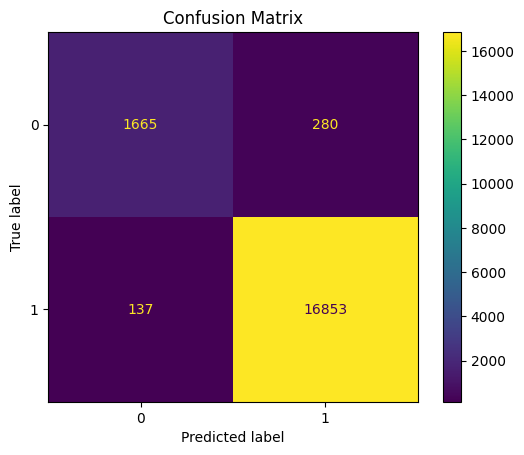

Classification Report:
              precision    recall  f1-score   support

           0      0.924     0.856     0.889      1945
           1      0.984     0.992     0.988     16990

    accuracy                          0.978     18935
   macro avg      0.954     0.924     0.938     18935
weighted avg      0.978     0.978     0.978     18935

Balanced accuracy: 0.924


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=3)

# Evaluate the model
evaluate_classification_model(dtc, X_train, y_train, X_test, y_test)

#### Random Forest

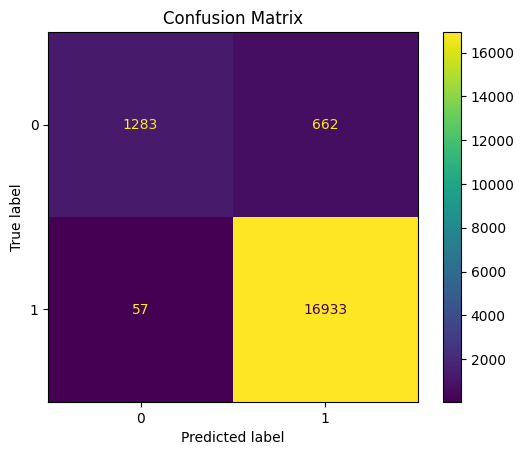

Classification Report:
              precision    recall  f1-score   support

           0      0.957     0.660     0.781      1945
           1      0.962     0.997     0.979     16990

    accuracy                          0.962     18935
   macro avg      0.960     0.828     0.880     18935
weighted avg      0.962     0.962     0.959     18935



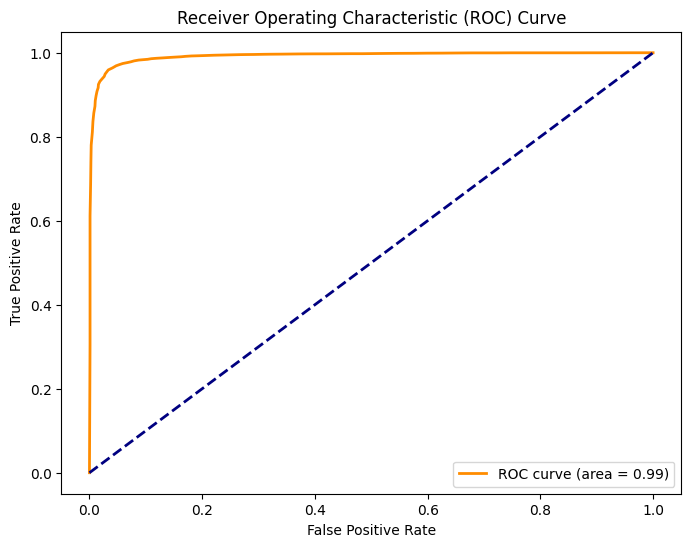

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=1,
                            max_depth=None, random_state=42)

# Calling 'evaluate_classification_model' to get the results of prediction
evaluate_classification_model(rf, X_train, y_train, X_test, y_test)

#### K Nearest Neighbors

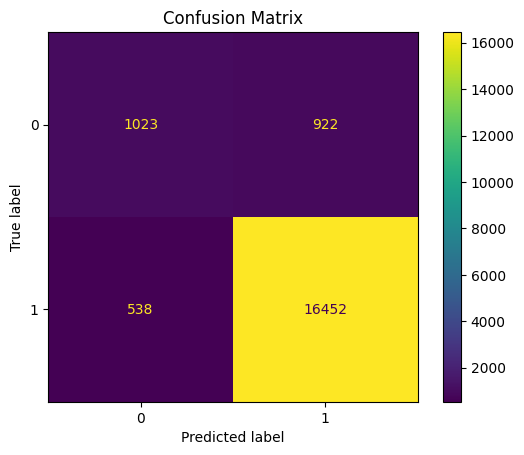

Classification Report:
              precision    recall  f1-score   support

           0      0.655     0.526     0.584      1945
           1      0.947     0.968     0.958     16990

    accuracy                          0.923     18935
   macro avg      0.801     0.747     0.771     18935
weighted avg      0.917     0.923     0.919     18935

Balanced accuracy: 0.747


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Calling 'evaluate_classification_model' to get the results of prediction
evaluate_classification_model(knn, X_train, y_train, X_test, y_test)

#### XGBoost

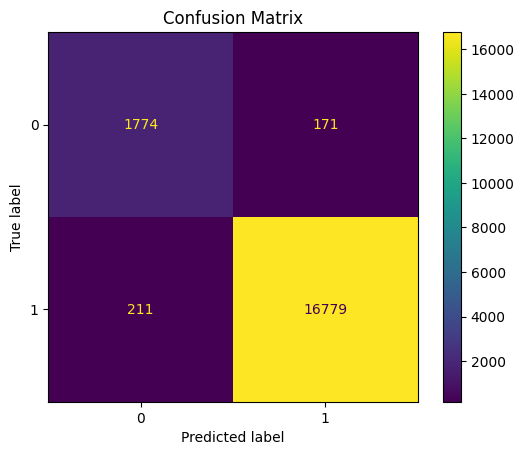

Classification Report:
              precision    recall  f1-score   support

           0      0.894     0.912     0.903      1945
           1      0.990     0.988     0.989     16990

    accuracy                          0.980     18935
   macro avg      0.942     0.950     0.946     18935
weighted avg      0.980     0.980     0.980     18935

Balanced accuracy: 0.950


In [ ]:
from xgboost import XGBClassifier

# XG Boost Classifier
xgb = XGBClassifier(subsample=0.7, n_estimators=150, max_depth=4, learning_rate=0.2, gamma=0.1, random_state=42)

# Calling 'evaluate_classification_model' to get the results of prediction
evaluate_classification_model(xgb, X_train, y_train,  X_test, y_test)

### 3.4 Regression Algorithms

#### Defining Regression Evaluation Function

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate regression model performance using common metrics.

    Args:
    - model: Trained regression model.
    - X_train (array-like): Features of the training set.
    - y_train (array-like): Target values of the training set.
    - X_test (array-like): Features of the test set.
    - y_test (array-like): Target values of the test set.

    Returns:
    - metrics (dict): Dictionary containing evaluation metrics.
    """

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store metrics in a dictionary
    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

    return metrics

# Usage example:
# metrics = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
# print(metrics)


#### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Creating the Decision Tree Regressor
dct_reg = DecisionTreeRegressor(random_state=42)

In [ ]:
evaluate_regression_model(dct_reg, X_train, y_train, X_test, y_test)

{'MAE': 71406.65434380776,
 'MSE': 49067142381.83259,
 'RMSE': 221511.04347601405,
 'R-squared': 0.9283735636813305}

#### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the Gradient Boosting Regressor
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

In [ ]:
evaluate_regression_model(gradient_boosting_reg, X_train, y_train, X_test, y_test)

{'MAE': 72552.81711019296,
 'MSE': 32890107321.637417,
 'RMSE': 181356.29937125818,
 'R-squared': 0.9519882132271938}